In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from PIL import Image

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = '20'

### Entire Training Dataset

In [2]:
df = pd.read_csv('all_data_info.csv')

In [45]:
print(df.shape)
df.head()

(103250, 12)


,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


In [5]:
# number of artists
len(df['artist'].unique())

2319

In [7]:
# missing artist names?
df['artist'].isnull().sum()

0

In [34]:
# num paintings per artist
by_artist = pd.DataFrame(df['artist'].value_counts().reset_index())
by_artist.columns = ['artist','count']
by_artist

,artist,count
0,Ivan Aivazovsky,500
1,John Singer Sargent,500
2,Pierre-Auguste Renoir,500
3,Marc Chagall,500
4,Pablo Picasso,500
...,...,...
2314,Adoration of the Shepherds,1
2315,Dua,1
2316,Transfer Series,1
2317,Portrait of a Woman,1


In [65]:
# number of artists with > 200 paintings
len(by_artist[by_artist['count'] >= 200])

110

In [66]:
# remove data where < 200 paintings per artist
by_artist = by_artist[by_artist['count'] >= 200]

Text(0.5, 0, 'num paintings')

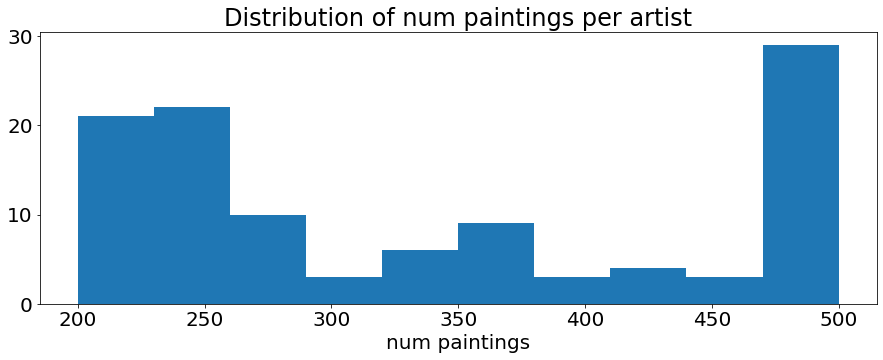

In [69]:
plt.hist(by_artist['count'])
plt.title('Distribution of num paintings per artist')
plt.xlabel('num paintings')

In [70]:
# removing artists from the main df that have < 200 paintings
df_200 = df[df['artist'].isin(by_artist['artist'])]

In [72]:
df_200.shape # 37452 rows

(37452, 12)

### Subset: Train 1

In [80]:
# entire training set to large so downloading subset train 1
filenames_train1 = []
with zipfile.ZipFile('train_1.zip', 'r') as zip:
    for info in zip.infolist():
        name = info.filename.split('/')
        filenames_train1.append(name[1])

In [84]:
train1_df = df_200[df_200['new_filename'].isin(filenames_train1)] 

In [88]:
train1_df.reset_index(inplace=True)

In [89]:
train1_df.head()

,index,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,74,Henri de Toulouse-Lautrec,1895,genre painting,5833.0,3985.0,3389831.0,wikiart,Post-Impressionism,Abandonment (The pair),train_and_test,True,17354.jpg
1,110,William-Adolphe Bouguereau,1892,genre painting,3701.0,5490.0,2026238.0,wikiart,Realism,Leveil Heart,train_and_test,True,19834.jpg
2,142,Ferdinand Hodler,1879,portrait,3672.0,5004.0,11552440.0,wikiart,Realism,The pastor,train_and_test,True,100829.jpg
3,149,Ferdinand Hodler,c.1906,landscape,4806.0,3732.0,10789503.0,wikiart,Symbolism,"Lake Geneva, overlooking the Savoyerberge",train_and_test,True,16019.jpg
4,178,Ferdinand Hodler,1909,landscape,4866.0,3540.0,10336647.0,wikiart,Symbolism,Thun with symmetric mirroring,train_and_test,True,10805.jpg


__Only contains data in train_1 with artists that have >= 200 paintings__

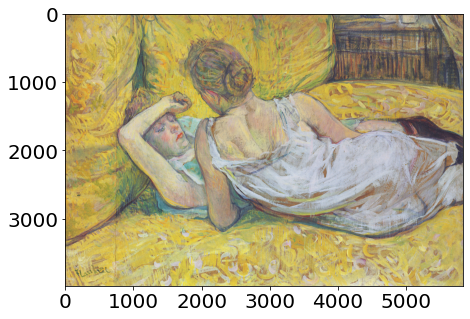

In [97]:
# looking at some images
archive = zipfile.ZipFile('train_1.zip', 'r')
file = train1_df.loc[0]['new_filename']
imgdata = archive.open('train_1/'+file)
img = Image.open(imgdata)
plt.imshow(img)
plt.show()